## Modul 2: Operasi Dasar Citra

### 1. Lakukan operasi dibawah ini menggunakan gambar diatas:
#### a. translasi sejauh x = -50 dan y = 40
#### b. rotasi dengan sudut 70 derajat
#### c. pencerminan terhadap sumbu x dan sumbu y
#### d. dilatasi matriks dengan faktor skala = 3

##### Mengimportkan Library yang akan digunakan

In [1]:
import cv2 as cv
# Mengimportkan library OpenCV yang digunakan untuk pengolahan citra dan video
import numpy as np 
# Mengimportkan library Numpy sebagai alat bantu matematika yang sering digunakan dalam pengolahan citra
import matplotlib.pyplot as plt 
# Mengimportkan library matplotlib.pyplot yang digunakan untuk membuaut plot grafik dan visualisasi data

##### Membaca citra serta mengkonversi citra menjadi grayscale

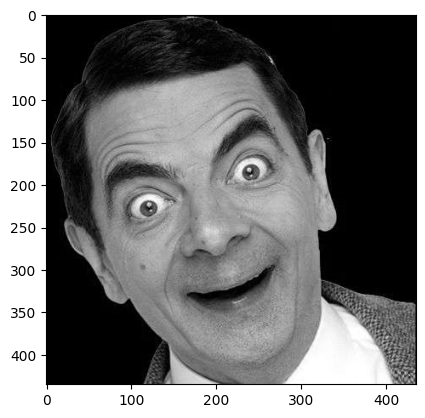

In [2]:
defIMG = plt.imread("beanny.jpg")
# membuat variabel yang nantinya akan menyimpan citra beanny.jpg menggunakan library plt yaitu imread
grayIMG = cv.cvtColor(defIMG, cv.COLOR_BGR2GRAY)
# melakukan konversi gambar menjadi grayscale dengan menggunakan fungsi dari library cv2
# yaitu cvtColor yang semula citra berbentuk BGR menjadi GRAY
plt.imshow(grayIMG,cmap="gray")
# menampilkan gambar menggunakan fungsi imshow dari matplotlib dan argumen cmap gray, agar menampilkan grayscale

##### a. Membuat fungsi untuk melakukan translasi pada citra

In [3]:
def transIMG(image,x,y):
# membuat fungsi dengan nama transIMG dengan parameter citra, perubahan x dan perubahan y
    resultImg = np.zeros(image.shape).astype(int)
    # membuat matriks kosong yang berukuran seperti gambar inputan dan bertipe integer
    if(x<0):
        # membuat kondisi jika perubahan x berada di bawah nol, untuk menghindari indeks out of bound
        x=np.abs(x)
        # mengubah nilai negatif dari x menjadi positif menggunakan abs() dari numpy
        for i in range(image.shape[0]-x):
            # melakujan perulangan dengan nilai awal besar baris dikurangi x
            for j in range (image.shape[1]-1,y,-1):
                # melakujan perulangan dengan nilai awal besar kolom dikurangi 1, dan batasan y decrement
                    resultImg[i+x,j-y] = image[i,j]
                    # menyimpan piksel dari image awal ke matriks baru dengan perubahan indeks setelah translasi
    return resultImg

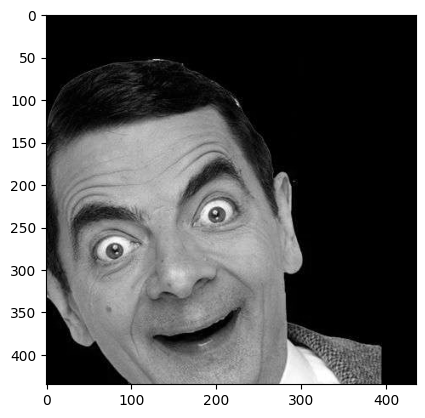

In [4]:
trIMG = transIMG(grayIMG,-50,40)
plt.imshow(trIMG,cmap="gray",)

##### b. Membuat fungsi untuk melakukan rotasi

In [5]:
def fixrotIMG (image, angle):
# membuat fungsi dengan nama fixrotIMG dengan parameter citra, dan sudut rotasnya
    angle = -angle*(np.pi/180)
    # mendapatkan nilai radiant agar perputaran rotasi berlawanan dengan arah jarum jam
    cos = (np.cos(angle))
    # mendapatkan nilai cos dari sudut inputan dengan mengalikan dengan fungsi cos dari numpy
    sin = (np.sin(angle))
    # mendapatkan nilai sin dari sudut inputan dengan mengalikan dengan fungsi sin dari numpy
    center_x = image.shape[0]//2
    # mendapatkan koordinat titik tengah dari sumbu x berdasarkan gambar inputan dan membulatkannya kebawah agar tidak menghasilkan nilai desimal
    center_y = image.shape[1]//2
    # mendapatkan koordinat titik tengah dari sumbu y berdasarkan gambar inputan dan membulatkannya kebawah agar tidak menghasilkan nilai desimal
    resultImg = np.zeros(image.shape).astype(int)
    # membuat matriks kosong yang berukuran seperti gambar inputan dan bertipe integer
    for i in range(image.shape[0]):
    # melakukan perulangan dengan batas besar baris dari gambar
        for j in range(image.shape[1]):
        # melakukan perulangan dengan batas besar kolom dari gambar
            x2 = int((i - center_x) * cos - (j - center_y) * sin + center_x)
            # mendapatkan koordinat x baru berdasarkan rotasi sudut dengan rumusnya
            y2 = int((i - center_x) * sin + (j - center_y) * cos + center_y)
            # mendapatkan koordinat y baru berdasarkan rotasi sudut dengan rumusnya
            if 0 <= x2 < image.shape[0] and 0 <= y2 < image.shape[1]:
                # membuat kondisi untuk memeriksa agar hasil koordinat baru tidak melebihi index dari gambar
                resultImg[i][j]=image[x2][y2]
                # menyimpan piksel dari koordinat baru ke matriks kosong
    return resultImg

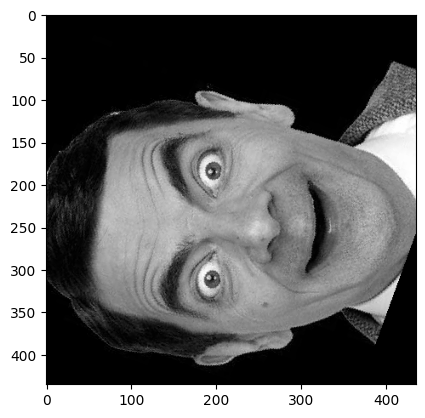

In [6]:
rotIMG = fixrotIMG(grayIMG,70)
plt.imshow(rotIMG,cmap="gray",)

##### c.(1) Melakukan Pencerminan pada sumbu X

In [7]:
def mirrX (image):
# membuat fungsi untuk melakukan mirror sumbu x dengan parameter citra
    resultIMG = np.zeros(image.shape).astype(int)
    # membuat matriks kosong yang berukuran seperti gambar inputan dan bertipe integer
    for i in range(image.shape[0]):
        # melakukan perulangan dengan batas besar baris dari gambar
        for j in range(image.shape[1]):
        # melakukan perulangan dengan batas besar kolom dari gambar
            resultIMG[i,j] = image [image.shape[0]-1-i][j]
            # melakukan operasi pada indeks i pada gambar inputan dengan menguragi dengan besar baris nya
            # kemudian menyimpan nilai piksel dari koordinat tsb ke matriks baru
    return resultIMG

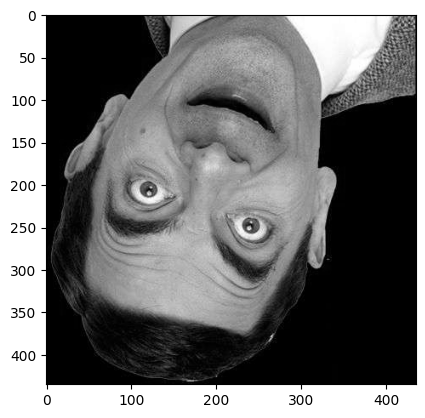

In [8]:
mirXimg = mirrX(grayIMG)
plt.imshow(mirXimg,cmap="gray")

##### c.(2) pencerminan sumbu y

In [9]:
def mirrY (image):
# membuat fungsi untuk melakukan mirror sumbu y dengan parameter citra
    resultIMG = np.zeros(image.shape).astype(int)
    # membuat matriks kosong yang berukuran seperti gambar inputan dan bertipe integer
    for i in range(image.shape[0]):
    # melakukan perulangan dengan batas besar baris dari gambar
        for j in range(image.shape[1]):
        # melakukan perulangan dengan batas besar kolom dari gambar
            resultIMG[i,j] = image [i][image.shape[1]-1-j]
            # melakukan operasi pada indeks j pada gambar inputan dengan menguragi dengan besar kolom nya
            # kemudian menyimpan nilai piksel dari koordinat tsb ke matriks baru
    return resultIMG

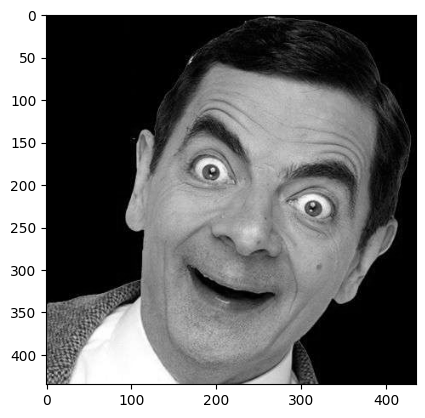

In [10]:
mirYimg = mirrY(grayIMG)
plt.imshow(mirYimg,cmap="gray")

##### d.(1) Dilatasi Memperbesar

In [11]:
def dilZoomIn(image, skala):
# membuat fungsi untuk melakukan dilatasi memperbesar dengan parameter citra dan skala perubahan
    result = np.zeros([image.shape[0]*skala, image.shape[1]*skala]).astype(int)
    # membuat matriks nol baru dengan ukurannya telah dikalikan dengan skala inputan dan bertipe integer
    for i in range(image.shape[0]):
    # melakukan perulangan dengan batas besar baris dari gambar
        for j in range(image.shape[1]):
        # melakukan perulangan dengan batas besar kolom dari gambar
            for x in range(i*skala, (i*skala)+skala):
            # melakukan perulangan x dengan nilai awal i dikalikan sekala dan batasan i dikali skala dan ditambah skala
            # berfungsi untuk mendapatkan ukuran baris dari satu pembesaran piksel
                for y in range(j*skala, (j*skala)+skala):
                # melakukan perulangan y dengan nilai awal j dikalikan sekala dan batasan j dikali skala dan ditambah skala
                # berfungsi untuk mendapatkan ukuran kolom dari satu pembesaran piksel
                    result[x][y] = image[i][j]
                    # menyimpan nilai dari gambar inputan ke matriks baru
    return result


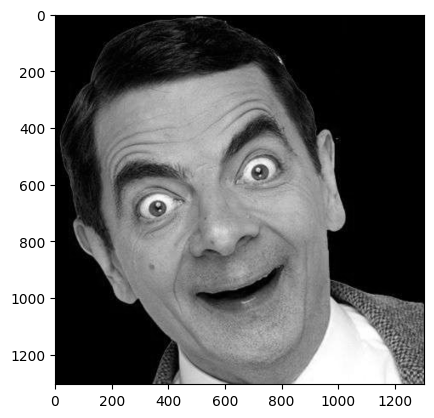

In [12]:
zoomInIMG = dilZoomIn(grayIMG,3)
plt.imshow(zoomInIMG,cmap="gray")

##### d.(2) Dilatasi memperkecil

In [13]:
def dilZoomOut(image, skala):
# membuat fungsi untuk melakukan dilatasi memperkecil dengan parameter citra dan skala perubahan
    temp = np.zeros([image.shape[0], image.shape[1]]).astype(int)
    # membuat matirks sementara baru dengan nilai nol dan ukuran berdasarkan gambar dan bertipe integer
    result = np.zeros([image.shape[0]//skala, image.shape[1]//skala]).astype(int)
    # membuat matirks  aru dengan nilai nol dan ukuran berdasarkan gambar dibagi skala dan bertipe integer
    for i in range(image.shape[0]):
    # melakukan perulangan dengan batas besar baris dari gambar
        for j in range(image.shape[1]):
        # melakukan perulangan dengan batas besar kolom dari gambar
            for x in range(int(i/skala), int(i/skala)+skala):
            # melakukan perulangan x dengan nilai awal i dibagi sekala dan batasan i dibagi skala dan ditambah skala
            # berfungsi untuk mendapatkan ukuran baris dari satu pengecilan piksel
                for y in range(int(j/skala), int(j/skala)+skala):
                # melakukan perulangan y dengan nilai awal j dibagi sekala dan batasan j dibagi skala dan ditambah skala
                # berfungsi untuk mendapatkan ukuran kolom dari satu pengecilan piksel
                        temp[x][y] = image[i][j]
                        # menyimpan nilai dari gambar inputan ke matriks sementara
    for i in range (result.shape[0]):
        # melakukan perulangan dengan batas besar baris dari gambar
        for j in range (result.shape[1]):
            # melakukan perulangan dengan batas besar kolom dari gambar
            result[i][j]=temp[i][j]
            # menyimpan nilai matriks sementara ke matriks baru dengan ukuran yang telah dibagikan dengan skala
    return result

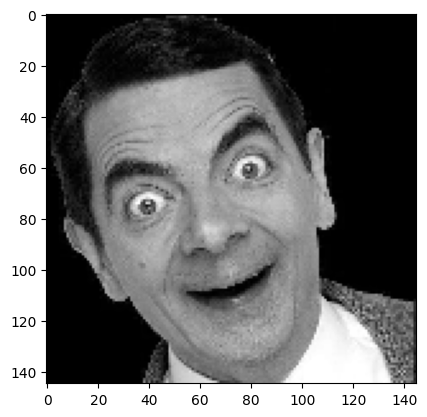

In [14]:
zoomOUT = dilZoomOut(grayIMG,3)
plt.imshow(zoomOUT,cmap = "gray")

### 2 Lakukan operasi citra negatif dari citra grayscale lalu bandingkan histogram kedua citra tersebut

#### Menkonversi citra menjadi negatif

In [15]:
def negImage(image, imgbit):
# membuat fungsi untuk melakukan perubahan citra ke citra negatif dengan parameter citra dan besar bit gambar
    resultImg = np.zeros(image.shape).astype(int)
    # membuat matriks baru nilai nol dengan ukuran sama dengan gambar inputan dan bertipe integer
    for i in range(image.shape[0]):
        # melakukan perulangan dengan batas besar baris dari gambar
        for j in range(image.shape[1]):
            # melakukan perulangan dengan batas besar kolom dari gambar
            resultImg[i,j]= ~image[i,j]
            # menyimpan nilai negasi dari setiap piksel dari gambar inputan ke matriks baru
    return resultImg

Text(0.5, 1.0, 'Negative Image')

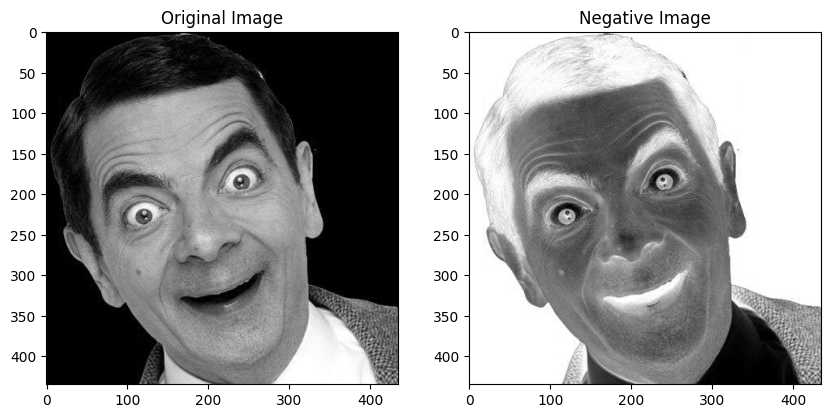

In [16]:
negatifIMG = negImage(grayIMG,8)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
# membuat plot dengan baris 1 dan colom 2 dan ukuran 10x10 yang berfungsi untuk menampilkan gambar sebanyak kolom
ax[0].imshow(grayIMG, cmap="gray")
ax[0].set_title('Original Image')
ax[1].imshow(negatifIMG, cmap="gray")
ax[1].set_title('Negative Image')

#### Membuat Histogram dari Citra Grayscale dan Citra Negatif

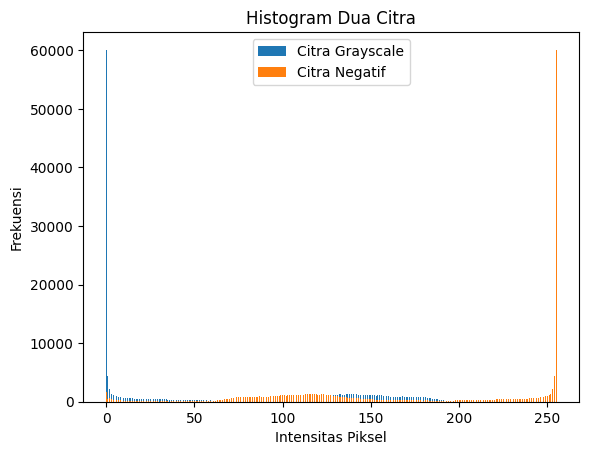

In [17]:
sumGray = np.zeros(256).astype(int)  
# inisialisasi array untuk menyimpan jumlah piksel dengan intensitas tertentu pada citra grayscale
sumNegative = np.zeros(256).astype(int)  
# inisialisasi array untuk menyimpan jumlah piksel dengan intensitas tertentu pada citra negatif
for i in range(grayIMG.shape[0]):  
    # loop sebanyak jumlah baris pada citra grayscale
    for j in range(grayIMG.shape[1]):  
        # loop sebanyak jumlah kolom pada citra grayscale
        grayValue = grayIMG[i][j]  
        # simpan nilai intensitas piksel grayscale pada koordinat (i, j)
        negativeValue = negatifIMG[i][j]  
        # simpan nilai intensitas piksel citra negatif pada koordinat (i, j)
        sumGray[grayValue] +=1  
        # tambahkan 1 pada indeks array dengan index yang sama dengan nilai intensitas piksel grayscale
        sumNegative[negativeValue] +=1  
        # tambahkan 1 pada indeks array dengan index yang sama dengan nilai intensitas piksel citra negatif
fig,ax=plt.subplots()  
# membuat plot dengan satu atau lebih sumbu
bar1 = ax.bar([i for i in range(256)], sumGray,0.5, label = 'Citra Grayscale')  
# membuat bar plot untuk citra grayscale
bar2 = ax.bar([i for i in range(256)], sumNegative,0.5, label = 'Citra Negatif')  
# membuat bar plot untuk citra negatif

ax.set_title('Histogram Dua Citra')  
# menambahkan judul plot
ax.set_xlabel('Intensitas Piksel')  
# menambahkan label sumbu x
ax.set_ylabel('Frekuensi')  
# menambahkan label sumbu y

ax.legend()  
# menambahkan legend pada plot

plt.show()  
# menampilkan plot yang sudah dibuat